# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [50]:
dataset = pd.read_csv('oil and gas stock prices.csv')

In [51]:
dataset

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD
...,...,...,...,...,...,...,...,...
39196,2022-06-06,SLB,47.79,48.00,46.88,47.22,6696970,USD
39197,2022-06-07,SLB,47.00,49.08,46.87,48.93,14692203,USD
39198,2022-06-08,SLB,49.00,49.83,48.08,49.57,15067131,USD
39199,2022-06-09,SLB,48.79,49.16,48.10,48.14,11447491,USD


### Checking for distinct values in each column.

In [52]:
dataset.nunique()

Date         5647
Symbol          8
Open        10964
High        11013
Low         10906
Close       11066
Volume      38380
Currency        1
dtype: int64

#### Here we have data of 8 different oil and gas company. We are going to train RNN model only on 1 comapie's data.

#### Droping 7 companie's data.

In [53]:
df1=dataset[dataset["Symbol"]=='XOM']

In [54]:
df1

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD
...,...,...,...,...,...,...,...,...
5642,2022-06-06,XOM,99.18,99.78,98.67,98.84,20682050,USD
5643,2022-06-07,XOM,99.70,103.43,99.49,103.37,36994384,USD
5644,2022-06-08,XOM,103.49,105.57,102.98,104.59,31442508,USD
5645,2022-06-09,XOM,103.42,104.57,102.16,102.33,26417288,USD


### Checking for duplicate values

In [55]:
df1.duplicated().sum()

0

### Checking for null values

In [56]:
df1.isnull().sum()

Date        0
Symbol      0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [57]:
df1.describe()

,Open,High,Low,Close,Volume
count,5647.000000,5647.000000,5647.000000,5647.000000,5.647000e+03
mean,67.941806,68.568870,67.318438,67.964041,1.790278e+07
std,19.390072,19.475525,19.309826,19.410198,1.021927e+07
min,30.700000,31.250000,29.750000,30.270000,3.851283e+06
25%,48.450000,48.970000,48.000000,48.395000,1.084503e+07
50%,72.050000,72.850000,71.330000,72.080000,1.488288e+07
75%,83.895000,84.660000,83.255000,83.980000,2.191033e+07
max,104.420000,105.570000,103.950000,104.590000,1.180235e+08


### We are going to train RNN on closing price. So droping remaining columns

In [58]:
df1=df1.iloc[:,5:6]
df1

,Close
0,39.16
1,38.41
2,40.50
3,42.59
4,42.47
...,...
5642,98.84
5643,103.37
5644,104.59
5645,102.33


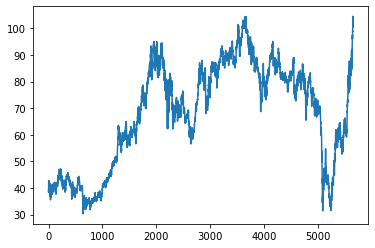

In [60]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

### Splitting data into training and testing set

In [62]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

### Reshaping

In [63]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [64]:
training_size,test_size

(3670, 1977)

In [65]:
train_data

array([[0.11961787],
       [0.10952637],
       [0.13764801],
       ...,
       [0.92209365],
       [0.93998924],
       [0.91402045]])

### Creating a data structure with 100 timesteps and 1 output

In [66]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [67]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [68]:
print(X_train.shape), print(y_train.shape)

(3569, 100)
(3569,)


(None, None)

In [69]:
print(X_test.shape), print(ytest.shape)

(1876, 100)
(1876,)


(None, None)

In [71]:
X_train

array([[0.11961787, 0.10952637, 0.13764801, ..., 0.15325619, 0.15110334,
        0.15069968],
       [0.10952637, 0.13764801, 0.16576964, ..., 0.15110334, 0.15069968,
        0.14060818],
       [0.13764801, 0.16576964, 0.16415501, ..., 0.15069968, 0.14060818,
        0.14693219],
       ...,
       [0.87769107, 0.85764263, 0.86033369, ..., 0.99703983, 0.98600646,
        0.98196986],
       [0.85764263, 0.86033369, 0.85266416, ..., 0.98600646, 0.98196986,
        0.9239774 ],
       [0.86033369, 0.85266416, 0.85037675, ..., 0.98196986, 0.9239774 ,
        0.92209365]])

In [72]:
X_test

array([[0.92451561, 0.91496233, 0.93474166, ..., 0.86544672, 0.8545479 ,
        0.84687836],
       [0.91496233, 0.93474166, 0.92115178, ..., 0.8545479 , 0.84687836,
        0.84499462],
       [0.93474166, 0.92115178, 0.9179225 , ..., 0.84687836, 0.84499462,
        0.84432185],
       ...,
       [0.54991927, 0.54305705, 0.55974166, ..., 0.90688913, 0.92599569,
        0.92263186],
       [0.54305705, 0.55974166, 0.5760226 , ..., 0.92599569, 0.92263186,
        0.9835845 ],
       [0.55974166, 0.5760226 , 0.57642626, ..., 0.92263186, 0.9835845 ,
        1.        ]])

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
X_train.shape

(3569, 100, 1)

In [75]:
X_train

array([[[0.11961787],
        [0.10952637],
        [0.13764801],
        ...,
        [0.15325619],
        [0.15110334],
        [0.15069968]],

       [[0.10952637],
        [0.13764801],
        [0.16576964],
        ...,
        [0.15110334],
        [0.15069968],
        [0.14060818]],

       [[0.13764801],
        [0.16576964],
        [0.16415501],
        ...,
        [0.15069968],
        [0.14060818],
        [0.14693219]],

       ...,

       [[0.87769107],
        [0.85764263],
        [0.86033369],
        ...,
        [0.99703983],
        [0.98600646],
        [0.98196986]],

       [[0.85764263],
        [0.86033369],
        [0.85266416],
        ...,
        [0.98600646],
        [0.98196986],
        [0.9239774 ]],

       [[0.86033369],
        [0.85266416],
        [0.85037675],
        ...,
        [0.98196986],
        [0.9239774 ],
        [0.92209365]]])

In [86]:
X_test.shape

(1876, 100, 1)

## Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [77]:
model=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [78]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [79]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [80]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

### Adding the output layer

In [81]:
model.add(Dense(units=1))

### Compiling the RNN

In [82]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Fitting the RNN to the Training set

In [84]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
56/56 [==============================] - 38s 411ms/step - loss: 0.0241 - val_loss: 0.0026
Epoch 2/100
56/56 [==============================] - 18s 322ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 3/100
56/56 [==============================] - 19s 331ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 4/100
56/56 [==============================] - 18s 325ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 5/100
56/56 [==============================] - 18s 325ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 6/100
56/56 [==============================] - 18s 326ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7/100
56/56 [==============================] - 19s 335ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 8/100
56/56 [==============================] - 19s 332ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 9/100
56/56 [==============================] - 19s 333ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 10/100
56/56 [==============================] - 15s 266ms/step - loss: 0.002

## Part 3 - Making the predictions and visualising the results

In [87]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

59/59 [==============================] - 5s 77ms/step


In [88]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [89]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

67.87984741396848

In [90]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

74.05702823274983

### visualising the results

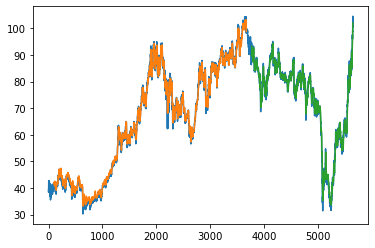

In [91]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Part 4 - Predicting closing stock price for next 30 days.

In [92]:
len(test_data)

1977

In [93]:
x_input=test_data[1877:].reshape(1,-1)
x_input.shape

(1, 100)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
temp_input

[0.576426264800861,
 0.5785791173304627,
 0.563778256189451,
 0.5721205597416577,
 0.6009149623250807,
 0.5906889128094724,
 0.6034714747039827,
 0.6056243272335844,
 0.6147739504843917,
 0.680301399354144,
 0.6774757804090419,
 0.6648277717976319,
 0.6881054897739503,
 0.701291711517761,
 0.6726318622174381,
 0.6556781485468244,
 0.6454520990312163,
 0.6719590958019375,
 0.6554090419806242,
 0.6420882669537136,
 0.6469321851453174,
 0.6453175457481162,
 0.6336114101184067,
 0.621501614639397,
 0.6256727664155004,
 0.6126210979547899,
 0.6400699677072119,
 0.6478740581270181,
 0.6579655543595264,
 0.6762648008611409,
 0.6831270182992466,
 0.7241657696447792,
 0.7649354144241118,
 0.7738159311087189,
 0.7066738428417654,
 0.741254036598493,
 0.7353336921420881,
 0.6944294940796554,
 0.6317276641550054,
 0.6278256189451024,
 0.6554090419806242,
 0.6512378902045208,
 0.6987351991388588,
 0.693891280947255,
 0.7112486544671688,
 0.7146124865446715,
 0.7391011840688912,
 0.7069429494079655,

In [96]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9497391]
101
1 day input [0.57857912 0.56377826 0.57212056 0.60091496 0.59068891 0.60347147
 0.60562433 0.61477395 0.6803014  0.67747578 0.66482777 0.68810549
 0.70129171 0.67263186 0.65567815 0.6454521  0.6719591  0.65540904
 0.64208827 0.64693219 0.64531755 0.63361141 0.62150161 0.62567277
 0.6126211  0.64006997 0.64787406 0.65796555 0.6762648  0.68312702
 0.72416577 0.76493541 0.77381593 0.70667384 0.74125404 0.73533369
 0.69442949 0.63172766 0.62782562 0.65540904 0.65123789 0.6987352
 0.69389128 0.71124865 0.71461249 0.73910118 0.70694295 0.7010226
 0.71999462 0.70398278 0.7111141  0.71165231 0.70586652 0.71824543
 0.73708288 0.76116792 0.72093649 0.74448332 0.76076426 0.7744887
 0.78417653 0.77354682 0.77623789 0.76372443 0.73815931 0.69954252
 0.69994618 0.7315662  0.76601184 0.73977395 0.75538213 0.77933262
 0.82656082 0.80785791 0.82642626 0.72914424 0.73667922 0.76049516
 0.75390205 0.78834769 0.81646932 0.8320775  0.81243272 0.81902583
 0.82871367 0.85602799 0.8628902  0.8

8 day output [[0.8853884]]
9 day input [0.6803014  0.67747578 0.66482777 0.68810549 0.70129171 0.67263186
 0.65567815 0.6454521  0.6719591  0.65540904 0.64208827 0.64693219
 0.64531755 0.63361141 0.62150161 0.62567277 0.6126211  0.64006997
 0.64787406 0.65796555 0.6762648  0.68312702 0.72416577 0.76493541
 0.77381593 0.70667384 0.74125404 0.73533369 0.69442949 0.63172766
 0.62782562 0.65540904 0.65123789 0.6987352  0.69389128 0.71124865
 0.71461249 0.73910118 0.70694295 0.7010226  0.71999462 0.70398278
 0.7111141  0.71165231 0.70586652 0.71824543 0.73708288 0.76116792
 0.72093649 0.74448332 0.76076426 0.7744887  0.78417653 0.77354682
 0.77623789 0.76372443 0.73815931 0.69954252 0.69994618 0.7315662
 0.76601184 0.73977395 0.75538213 0.77933262 0.82656082 0.80785791
 0.82642626 0.72914424 0.73667922 0.76049516 0.75390205 0.78834769
 0.81646932 0.8320775  0.81243272 0.81902583 0.82871367 0.85602799
 0.8628902  0.88845533 0.89303014 0.9058127  0.88441873 0.90917653
 0.90688913 0.92599569 0

16 day output [[0.85135424]]
17 day input [0.6719591  0.65540904 0.64208827 0.64693219 0.64531755 0.63361141
 0.62150161 0.62567277 0.6126211  0.64006997 0.64787406 0.65796555
 0.6762648  0.68312702 0.72416577 0.76493541 0.77381593 0.70667384
 0.74125404 0.73533369 0.69442949 0.63172766 0.62782562 0.65540904
 0.65123789 0.6987352  0.69389128 0.71124865 0.71461249 0.73910118
 0.70694295 0.7010226  0.71999462 0.70398278 0.7111141  0.71165231
 0.70586652 0.71824543 0.73708288 0.76116792 0.72093649 0.74448332
 0.76076426 0.7744887  0.78417653 0.77354682 0.77623789 0.76372443
 0.73815931 0.69954252 0.69994618 0.7315662  0.76601184 0.73977395
 0.75538213 0.77933262 0.82656082 0.80785791 0.82642626 0.72914424
 0.73667922 0.76049516 0.75390205 0.78834769 0.81646932 0.8320775
 0.81243272 0.81902583 0.82871367 0.85602799 0.8628902  0.88845533
 0.89303014 0.9058127  0.88441873 0.90917653 0.90688913 0.92599569
 0.92263186 0.9835845  1.         0.96959096 0.94442949 0.9497391
 0.93486416 0.92567647

24 day output [[0.8361882]]
25 day input [0.6126211  0.64006997 0.64787406 0.65796555 0.6762648  0.68312702
 0.72416577 0.76493541 0.77381593 0.70667384 0.74125404 0.73533369
 0.69442949 0.63172766 0.62782562 0.65540904 0.65123789 0.6987352
 0.69389128 0.71124865 0.71461249 0.73910118 0.70694295 0.7010226
 0.71999462 0.70398278 0.7111141  0.71165231 0.70586652 0.71824543
 0.73708288 0.76116792 0.72093649 0.74448332 0.76076426 0.7744887
 0.78417653 0.77354682 0.77623789 0.76372443 0.73815931 0.69954252
 0.69994618 0.7315662  0.76601184 0.73977395 0.75538213 0.77933262
 0.82656082 0.80785791 0.82642626 0.72914424 0.73667922 0.76049516
 0.75390205 0.78834769 0.81646932 0.8320775  0.81243272 0.81902583
 0.82871367 0.85602799 0.8628902  0.88845533 0.89303014 0.9058127
 0.88441873 0.90917653 0.90688913 0.92599569 0.92263186 0.9835845
 1.         0.96959096 0.94442949 0.9497391  0.93486416 0.92567647
 0.91876763 0.91209978 0.90522683 0.89833665 0.89167404 0.88538837
 0.8795498  0.8741858  0.8

In [97]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [98]:
len(df1)

5647

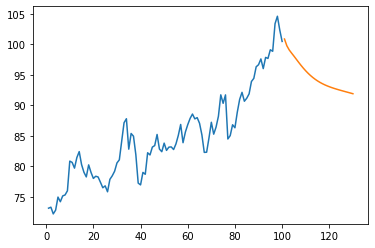

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[5547:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#### Better visualizing the plot

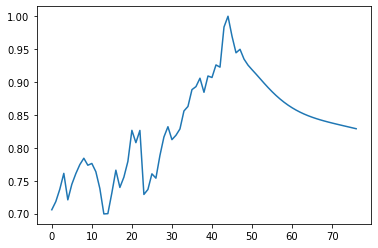

In [105]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5600:])